# Лабораторная работа №2
---



Из списка предложенных датасетов был выбран "Weather Prediction" - https://www.kaggle.com/datasets/ananthr1/weather-prediction

Каждая строка выборки представляет собой реальные данные на определенный день и описывает какая погода была в тот или иной день, сколько выпало осадков, минимальную и максимальную температуры.

Набор данных содержит следующие атрибуты:

* "date" (день наблюдений), с типом данных - дата
* "precipitation" (количество осадков за день (в мм)), с типом данных - число с плавающей точкой
* "temp_max" (максимальная температура за день (в градусах)), с типом данных - число с плавающей точкой
* "temp_min" (минимальная температура за день (в градусах)), с типом данных - число с плавающей точкой
* "wind" (скорость ветра (в м/с)), с типом данных - число с плавающей точкой
* "weather" (прогноз погоды), с типом данных - строка

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing

df = pd.read_csv("weather_dataset.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


Я оставил ту же выборку что была и в лабораторной №1, и так как в соответствии с заданием №1 нужно добавить еще один атрибут в таблицу, я решил добавить столбец (season), который будет писать времена года в зависимости от даты.

In [151]:
df['date'] = pd.to_datetime(df['date'])

def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['date'].apply(get_season)
df

,date,precipitation,temp_max,temp_min,wind,weather,season
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,Winter
1,2012-01-02,10.9,10.6,2.8,4.5,rain,Winter
2,2012-01-03,0.8,11.7,7.2,2.3,rain,Winter
3,2012-01-04,20.3,12.2,5.6,4.7,rain,Winter
4,2012-01-05,1.3,8.9,2.8,6.1,rain,Winter
...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,Winter
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,Winter
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,Winter
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,Winter


In [152]:
df[df.duplicated()]

,date,precipitation,temp_max,temp_min,wind,weather,season


In [153]:
def detect_and_clean_outliers_iqr(df, column):
    if column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        LowerBound = Q1 - 1.5 * IQR
        UpperBound = Q3 + 1.5 * IQR

        # Выявление выбросов
        IQR_Outliers = (df[column] < LowerBound) | (df[column] > UpperBound)

        outlier_values = df[IQR_Outliers][column]

        if not outlier_values.empty:
            print("Выбросы:")
            print(outlier_values)
        else:
            print("Выбросов не обнаружено.")

        number_of_outliers = outlier_values.shape[0]
        print("Количество выбросов, обнаруженных по методу IQR: ", number_of_outliers, "\n")

        # Удаление выбросов
        df_cleaned = df[~IQR_Outliers]
        return df_cleaned.reset_index(drop=True)
    else:
        print(f"Столбец '{column}' не найден в DataFrame.")
        return df


Немного модернизируем функцию из лабораторной №1, находим выбросы для каждого числового столбца, удаялем их и выводим обновленную таблицу.

In [154]:
print('precipitation')
clear_df = detect_and_clean_outliers_iqr(df, 'precipitation')
print('temp_max')
clear_df = detect_and_clean_outliers_iqr(df, 'temp_max')
print('temp_min')
clear_df = detect_and_clean_outliers_iqr(df, 'temp_min')
print('wind')
clear_df = detect_and_clean_outliers_iqr(df, 'wind')
clear_df

precipitation
Выбросы:
1       10.9
3       20.3
16       8.1
17      19.8
18      15.2
        ... 
1441    16.0
1446    21.8
1447    18.5
1450    27.4
1456     8.6
Name: precipitation, Length: 206, dtype: float64
Количество выбросов, обнаруженных по методу IQR:  206 

temp_max
Выбросов не обнаружено.
Количество выбросов, обнаруженных по методу IQR:  0 

temp_min
Выбросов не обнаружено.
Количество выбросов, обнаруженных по методу IQR:  0 

wind
Выбросы:
20      8.2
48      8.1
51      7.5
59      7.0
62      7.0
91      6.8
120     8.0
276     7.3
351     9.5
372     7.3
418     8.1
421     7.1
444     7.6
637     7.1
671     7.9
676     7.2
700     8.8
740     7.0
741     8.8
742     8.1
743     7.1
777     7.9
781     6.9
1040    6.7
1045    7.7
1046    7.6
1074    6.7
1358    6.8
1398    6.7
1399    7.2
1416    8.0
1439    7.5
1449    6.7
1452    7.6
Name: wind, dtype: float64
Количество выбросов, обнаруженных по методу IQR:  34 



,date,precipitation,temp_max,temp_min,wind,weather,season
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,Winter
1,2012-01-02,10.9,10.6,2.8,4.5,rain,Winter
2,2012-01-03,0.8,11.7,7.2,2.3,rain,Winter
3,2012-01-04,20.3,12.2,5.6,4.7,rain,Winter
4,2012-01-05,1.3,8.9,2.8,6.1,rain,Winter
...,...,...,...,...,...,...,...
1422,2015-12-27,8.6,4.4,1.7,2.9,rain,Winter
1423,2015-12-28,1.5,5.0,1.7,1.3,rain,Winter
1424,2015-12-29,0.0,7.2,0.6,2.6,fog,Winter
1425,2015-12-30,0.0,5.6,-1.0,3.4,sun,Winter


In [155]:
print('Количество пропущенных значений clear_df["precipitation"]:', clear_df['precipitation'].isnull().sum())
print('Количество пропущенных значений clear_df["temp_max"]', clear_df['temp_max'].isnull().sum())
print('Количество пропущенных значений clear_df["temp_min"]', clear_df['temp_min'].isnull().sum())
print('Количество пропущенных значений clear_df["wind"]', clear_df['wind'].isnull().sum())

Количество пропущенных значений clear_df["precipitation"]: 0
Количество пропущенных значений clear_df["temp_max"] 0
Количество пропущенных значений clear_df["temp_min"] 0
Количество пропущенных значений clear_df["wind"] 0


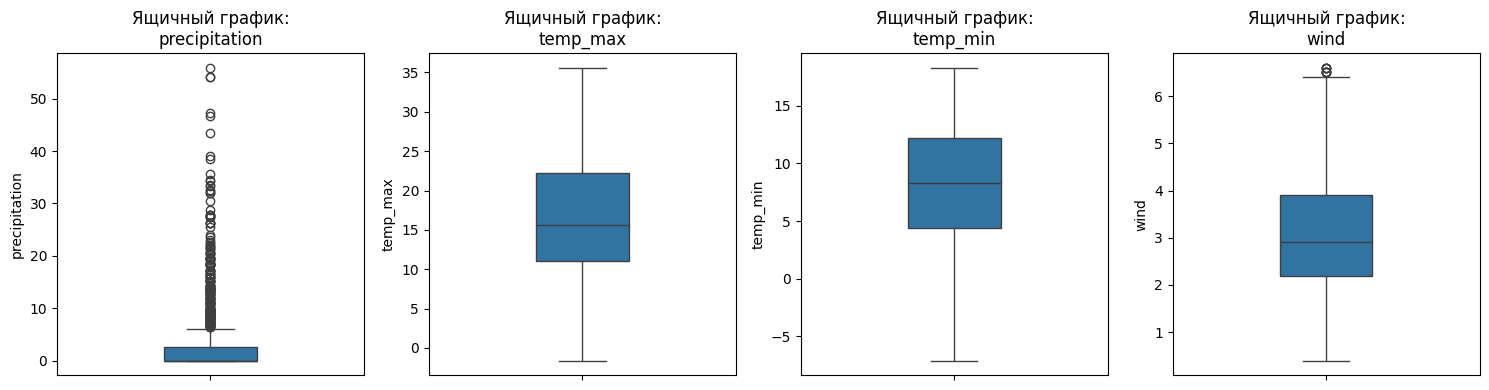

In [156]:
attributes = ['precipitation', 'temp_max', 'temp_min', 'wind']

num_cols = len(attributes)
num_rows = (num_cols // 4) + (num_cols % 4 > 0)
plt.figure(figsize=(15, num_rows * 4))

for i, col in enumerate(attributes):
    plt.subplot(num_rows, 4, i + 1)
    sns.boxplot(y=clear_df[col], width=0.3)
    plt.title(f'Ящичный график:\n{col}')

plt.tight_layout()
plt.show()

Исходя из результатов ящичного графика для каждого атрибута таблицы можно сделать вывод, что выбивающихся значений на графиках не обнаружено.

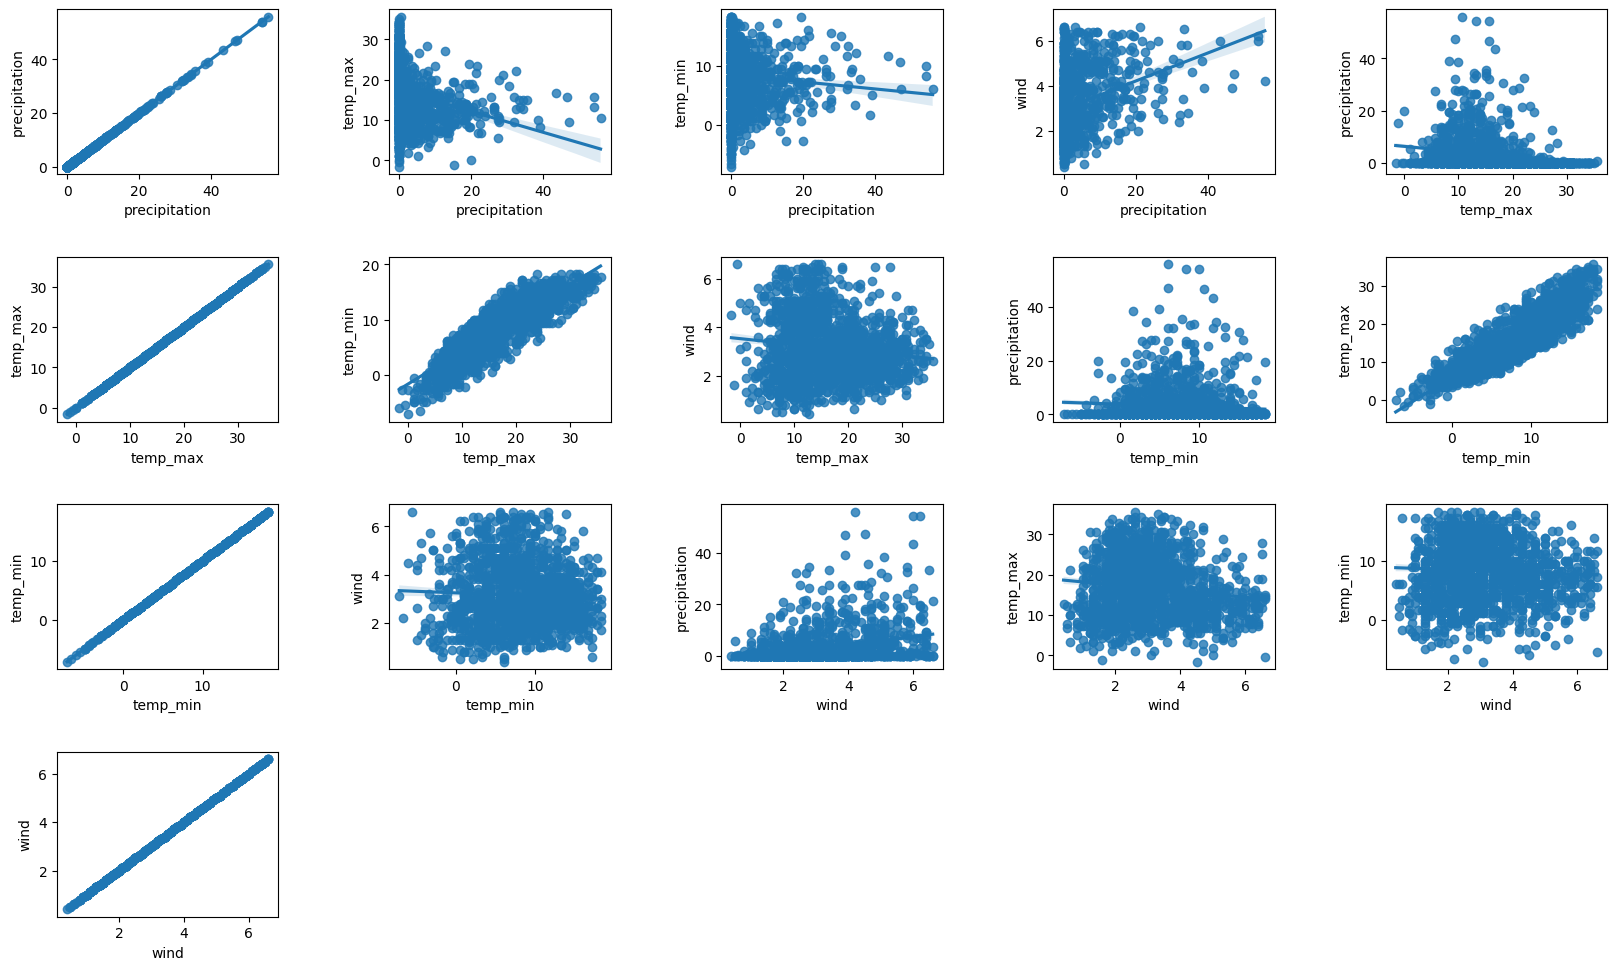

In [157]:
plt.figure(1 , figsize = (20 , 15))
n = 0
for x in ['precipitation', 'temp_max', 'temp_min','wind']:
    for y in ['precipitation', 'temp_max', 'temp_min','wind']:
        n += 1
        plt.subplot(5, 5, n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = clear_df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

Ситуация аналогичная предыдущей лабораторной работе, когда наибольшая корреляция прослеживается между атрибутами максимальной температуры (temp_max) и минимальной (temp_min), поэтому и график разброса лучше сделать между этими двумя атрибутами для большей наглядности.  

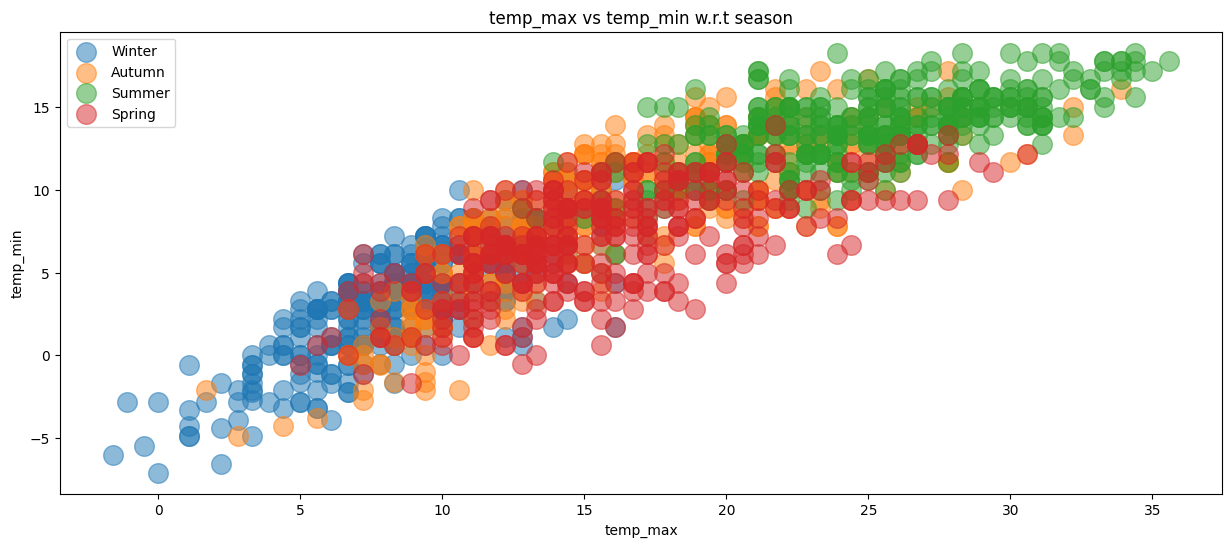

In [158]:
plt.figure(1 , figsize = (15 , 6))
for season in ['Winter', 'Autumn', 'Summer', 'Spring']:
    plt.scatter(x = 'temp_max' , y = 'temp_min' , data = df[df['season'] == season] ,
                s = 200 , alpha = 0.5 , label = season)
plt.xlabel('temp_max'), plt.ylabel('temp_min')
plt.title('temp_max vs temp_min w.r.t season')
plt.legend()
plt.show()

На диаграмме представлен график разброса, который отображает взаимосвязь между максимальной температурой (temp_max) и минимальной температурой (temp_min) в зависимости от сезона.

Наблюдается положительная корреляция между максимальной и минимальной температурами. С увеличением значения temp_max, значения temp_min также имеют тенденцию к увеличению.

Применение метода KMeans к моему датасету представлен на диаграммах ниже

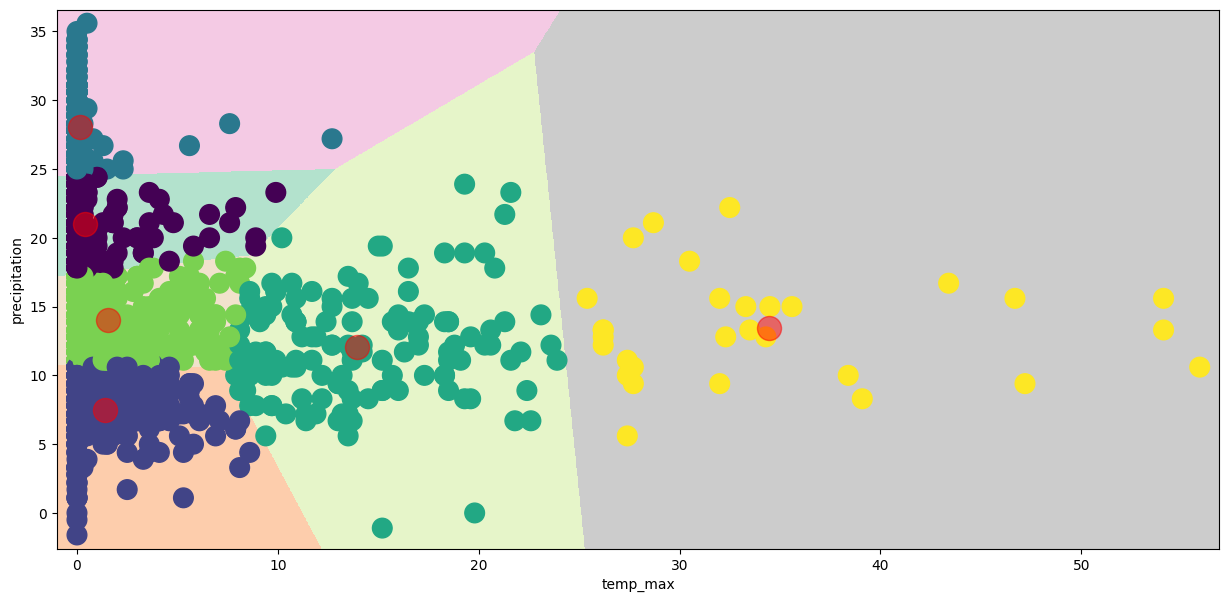

In [159]:
X1 = clear_df[['precipitation', 'temp_max']].iloc[: , :].values

algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z1 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z1 = Z1.reshape(xx.shape)
plt.imshow(Z1 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'precipitation' ,y = 'temp_max' , data = clear_df , c = labels1 , s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('precipitation') , plt.xlabel('temp_max')
plt.show()

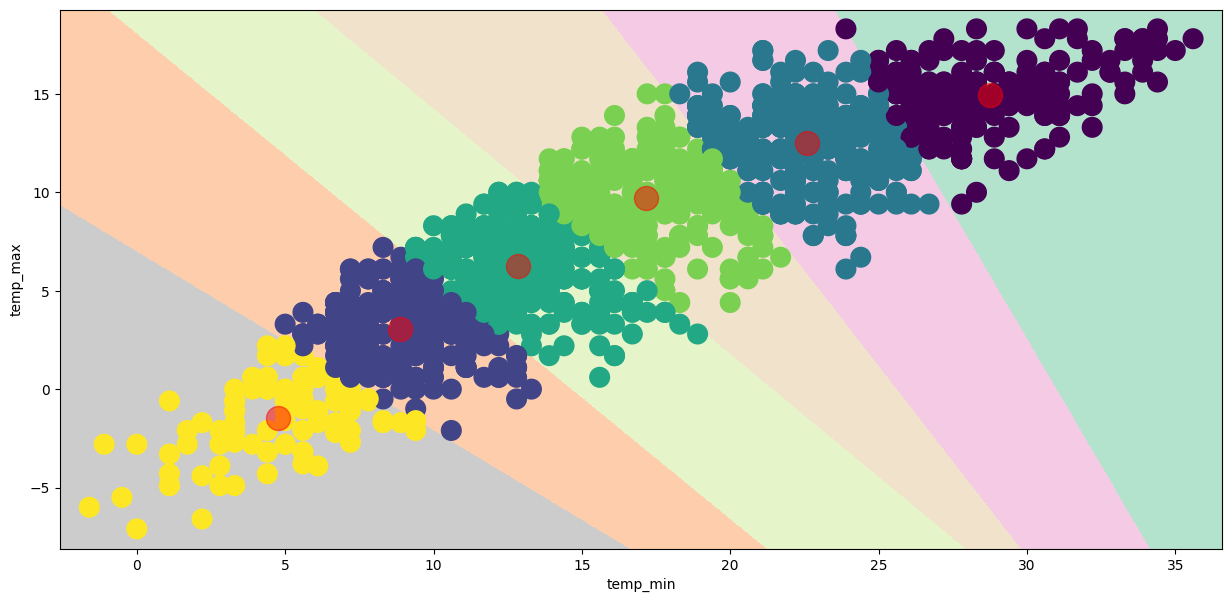

In [160]:
X2 = clear_df[['temp_max', 'temp_min']].iloc[: , :].values

algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'temp_max' ,y = 'temp_min' , data = clear_df , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('temp_max') , plt.xlabel('temp_min')
plt.show()

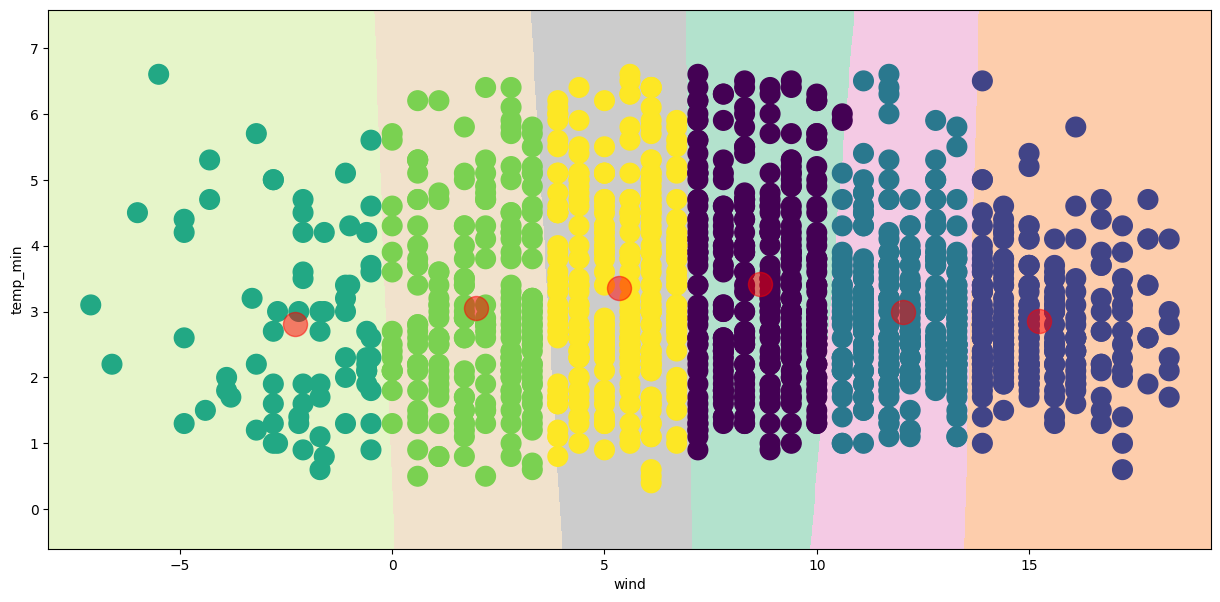

In [161]:
X3 = clear_df[['temp_min', 'wind']].iloc[: , :].values

algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z3 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z3 = Z3.reshape(xx.shape)
plt.imshow(Z3 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'temp_min' ,y = 'wind' , data = clear_df , c = labels3 , s = 200 )
plt.scatter(x = centroids3[: , 0] , y =  centroids3[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('temp_min') , plt.xlabel('wind')
plt.show()

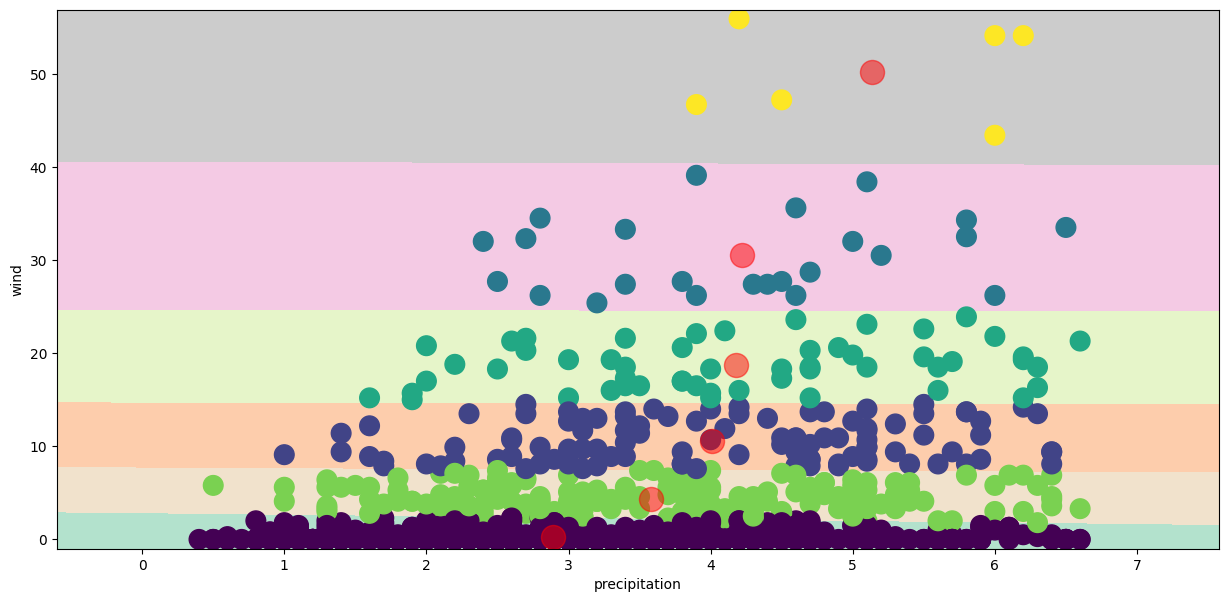

In [162]:
X4 = clear_df[['wind', 'precipitation']].iloc[: , :].values

algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X4)
labels4 = algorithm.labels_
centroids4 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z4 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z4 = Z4.reshape(xx.shape)
plt.imshow(Z4 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'wind' ,y = 'precipitation' , data = clear_df , c = labels4 , s = 200 )
plt.scatter(x = centroids4[: , 0] , y =  centroids4[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('wind') , plt.xlabel('precipitation')
plt.show()

Проанализировав диаграммы кластеров можно сказать что самой результативной является диаграмма по параметрам temp_min и temp_max. Наблюдается четкая тенденция к увеличению максимальной температуры с ростом минимальной температуры, что в свидетельствует о положительной корреляции между этими переменными.

Также кластеры имеют четко выраженные границы, это позволяет нам легко определить группы данных.

Также наблюдается разброс значений минимальной температуры в зависимости от скорости ветра, однако четкой зависимости между ними не прослеживается.